In [260]:
import scipy.linalg
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
plt.style.use('ggplot')

Problem 3


In [5]:
Y = scipy.io.loadmat('tt_embedding.mat')['A']

In [278]:
# in order to calculate the real error, I choose to translate the glist I get back to a tensor... 
def tt2tensor(Glist):
    full_shape = [g.shape[1] for g in Glist]
    full_tensor = Glist[0].reshape(full_shape[0],-1)
    for g in Glist[1:]:
        rank_prev, _, rank_next = g.shape
        g = g.reshape(rank_prev, -1)
        full_tensor = np.dot(full_tensor, g)
        full_tensor = full_tensor.reshape(-1, rank_next)

    return full_tensor.reshape(full_shape)

# function to calculate the real error. 
def tt_minus_tensor(Glist,tensor):
    difference = np.add(tt2tensor(Glist),(-1)*tensor)
    return scipy.linalg.norm(difference)

# get the rank. 
def mySVD(matrix,errorbound):
    for k in range(1,min(matrix.shape)):
        u,s,v=svds(matrix,k=k,tol = errorbound)
        composed = np.dot(np.dot(u,np.diag(s)),v)
        error = scipy.linalg.norm(composed - matrix)
        if error < errorbound:
            break
    return u,s,v,k

# get the compression ratio
def CalcCompression(Glist,tensor):
    summ = np.sum([factor.size for factor in Glist])
    return summ/tensor.size

In [279]:
# The main function 
def TT_SVD(Y,errorbound):
    shape = Y.shape
    dim = len(shape)
    delta = errorbound/((dim-1)**0.5)*Af
    C = Y
    Glist = [None]*dim
    rlist = []
    rlist.append(1)
    for k in range(d-1):
        # follow the algorithm in the paper exactly 
        # reshape
        n_row = (rlist[k]*shape[k])
        C = C.reshape(n_row, -1)
        u,s,v,rank=mySVD(C,delta) 
        Glist[k]=u.reshape(rlist[k],shape[k],rank)
        rlist.append(rank)
        C = np.dot(np.diag(s),v)
    # for last G, r = 1 
    pr,lastR = C.shape
    Glist[-1] = C.reshape(pr,lastR,1)
    return Glist


In [295]:
listError = [0.01,0.05,0.1,0.5,1]
tensorlist = [TT_SVD(Y,i) for i in listError]

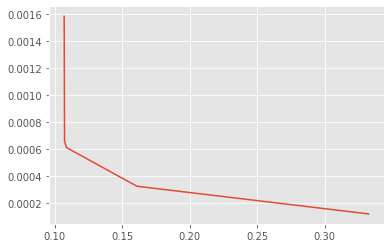

In [296]:
error = [tt_minus_tensor(g,Y) for g in tensorlist]
compressionratio = [CalcCompression(g,Y) for g in tensorlist]

plt.plot(error,compressionratio)

In [297]:
[compressionratio],[error]

([[0.0015828125, 0.0006565625, 0.000609375, 0.000323125, 0.000118125]],
 [[0.10696532, 0.107255444, 0.10871333, 0.16091849, 0.33241522]])